In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regressor Libraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Machine Learning Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Other Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv("Concrete_Data.csv")

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# Shorten the Column names
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)

In [5]:
data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
# There are no NULL values in the dataset!
data.isnull().sum().max()

0

In [7]:
data.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


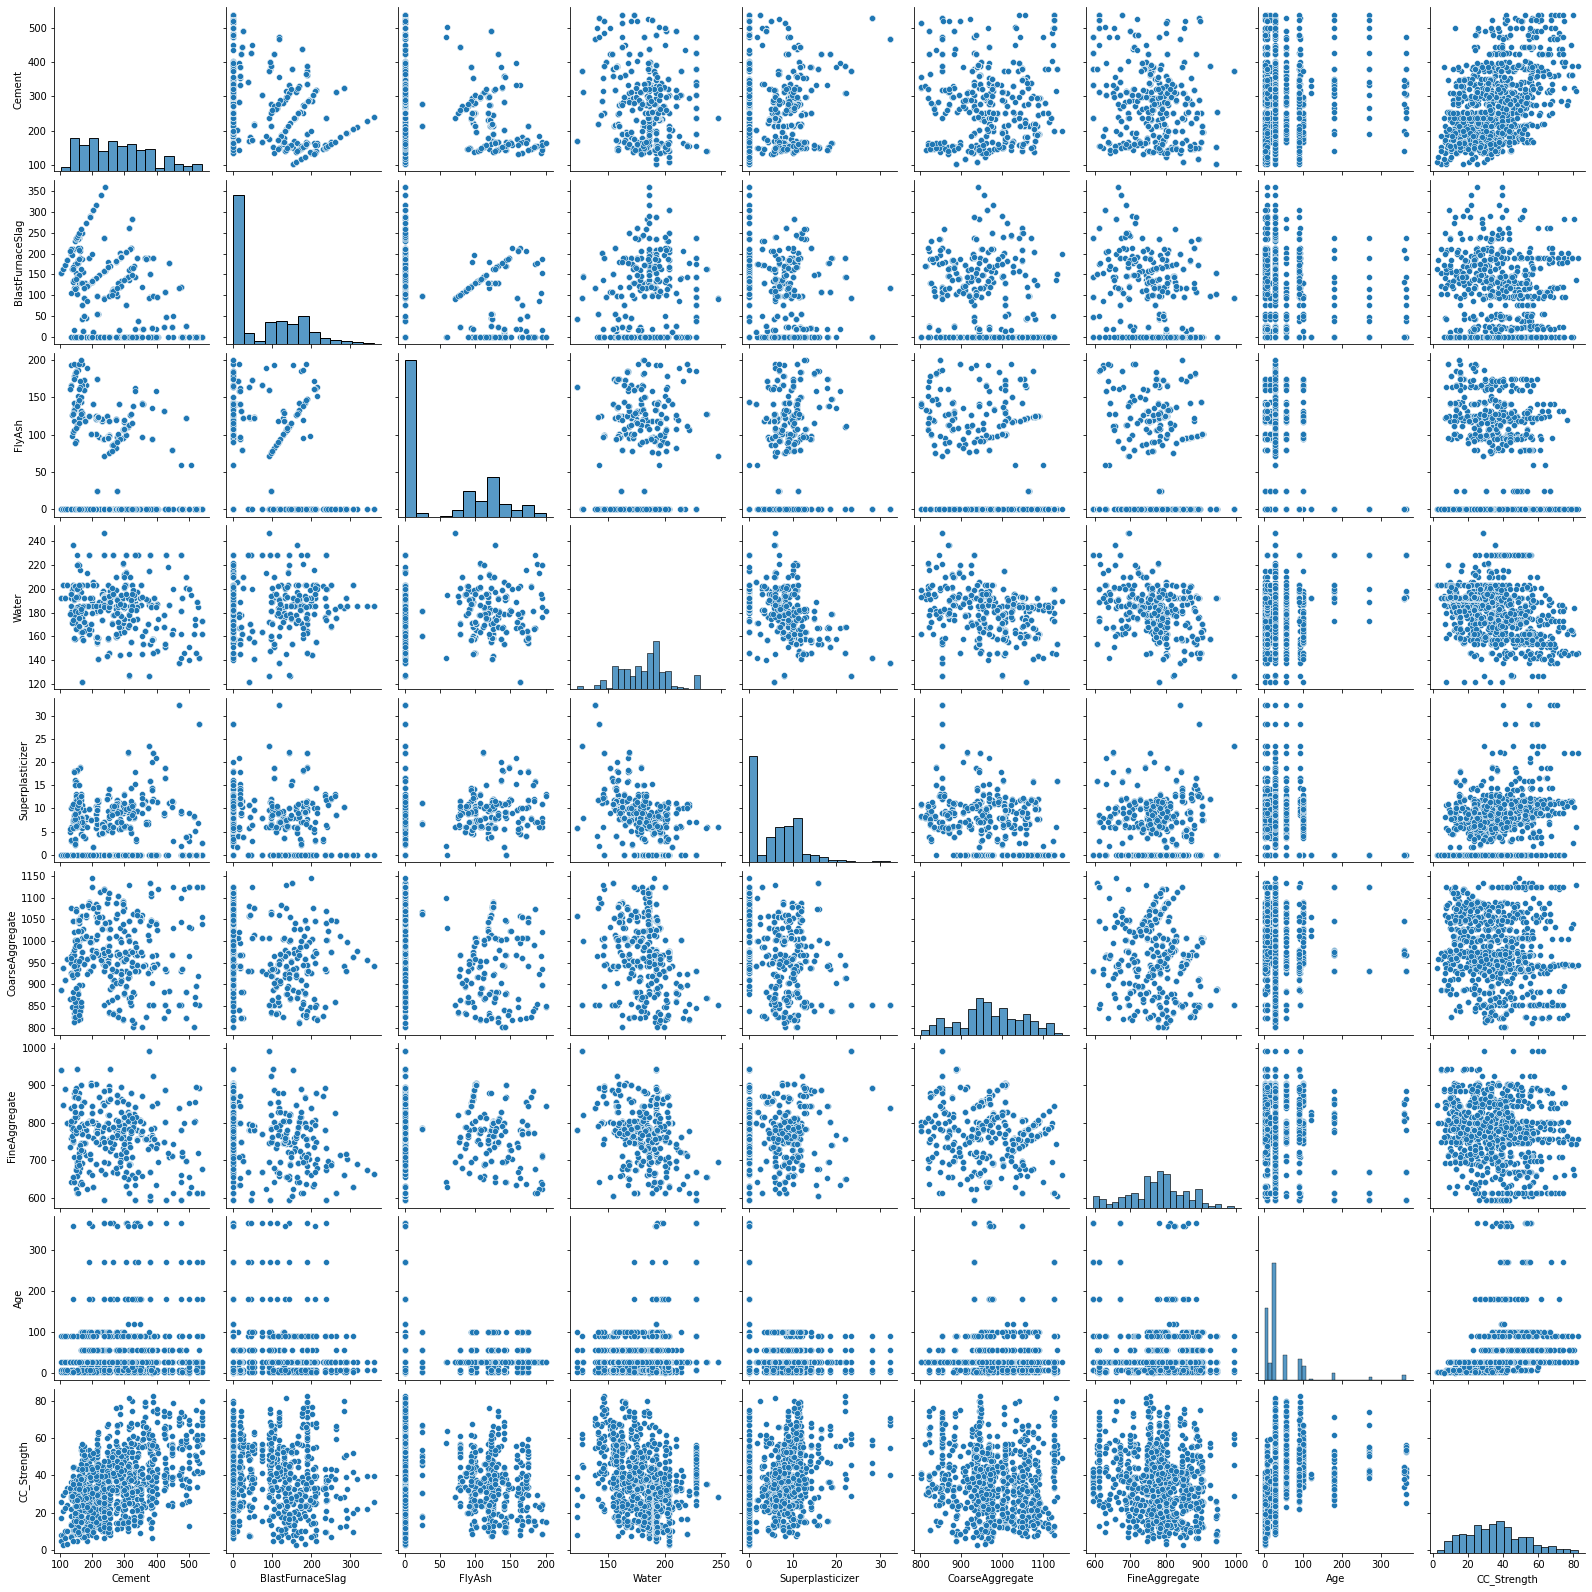

In [8]:
sns.pairplot(data)
plt.savefig("pairplot.png", bbox_inches = "tight")
plt.show()

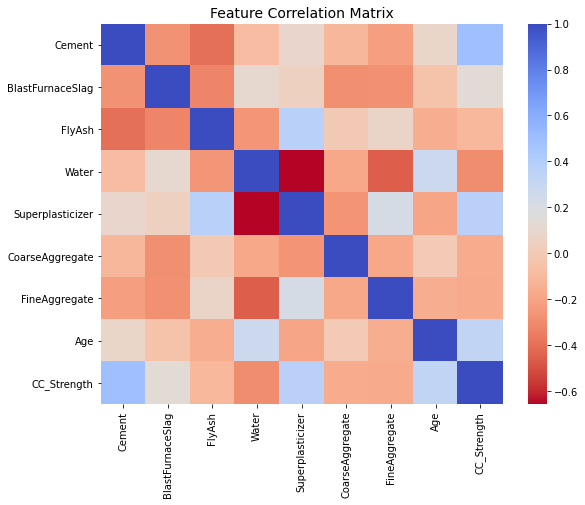

In [9]:
ax = plt.figure(figsize=(9,7))

sub_sample_corr = data.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r')
plt.title('Feature Correlation Matrix', fontsize=14)
plt.savefig("corr.png", bbox_inches = "tight")
plt.show()

In [10]:
# Data Preprocessing

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [14]:
dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

In [15]:
rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

n_inputs = X_train.shape[1]

model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 50)                450       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 3,123
Trainable params: 3,123
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(Adam(lr=0.001), loss='mean_squared_error')

In [18]:
model.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose=2)

Epoch 1/100
83/83 - 0s - loss: 1353.3254
Epoch 2/100
83/83 - 0s - loss: 606.6061
Epoch 3/100
83/83 - 0s - loss: 343.4016
Epoch 4/100
83/83 - 0s - loss: 235.9834
Epoch 5/100
83/83 - 0s - loss: 193.6309
Epoch 6/100
83/83 - 0s - loss: 172.4592
Epoch 7/100
83/83 - 0s - loss: 158.0343
Epoch 8/100
83/83 - 0s - loss: 150.5166
Epoch 9/100
83/83 - 0s - loss: 141.6222
Epoch 10/100
83/83 - 0s - loss: 136.3782
Epoch 11/100
83/83 - 0s - loss: 132.4110
Epoch 12/100
83/83 - 0s - loss: 129.2585
Epoch 13/100
83/83 - 0s - loss: 125.5606
Epoch 14/100
83/83 - 0s - loss: 123.0657
Epoch 15/100
83/83 - 0s - loss: 120.2827
Epoch 16/100
83/83 - 0s - loss: 117.8851
Epoch 17/100
83/83 - 0s - loss: 113.7631
Epoch 18/100
83/83 - 0s - loss: 112.5396
Epoch 19/100
83/83 - 0s - loss: 105.9781
Epoch 20/100
83/83 - 0s - loss: 102.8837
Epoch 21/100
83/83 - 0s - loss: 95.9344
Epoch 22/100
83/83 - 0s - loss: 88.5287
Epoch 23/100
83/83 - 0s - loss: 80.7183
Epoch 24/100
83/83 - 0s - loss: 73.5771
Epoch 25/100
83/83 - 0s - lo

In [19]:
y_pred_ann = model.predict(X_test, batch_size = 10)

In [20]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t\t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))
print("""Artificial Neural Network \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ann)),mean_squared_error(y_test, y_pred_ann),
            mean_absolute_error(y_test, y_pred_ann), r2_score(y_test, y_pred_ann)))

Model				 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 		 9.80 		 95.97 		7.75 		0.63
Decision Tree Regressor 	 6.52 		 42.45 		4.30 		0.84
Random Forest Regressor 	 5.65 		 31.94 		3.91 		0.88
Artificial Neural Network 	 5.70 		 32.45 		4.46 		0.87


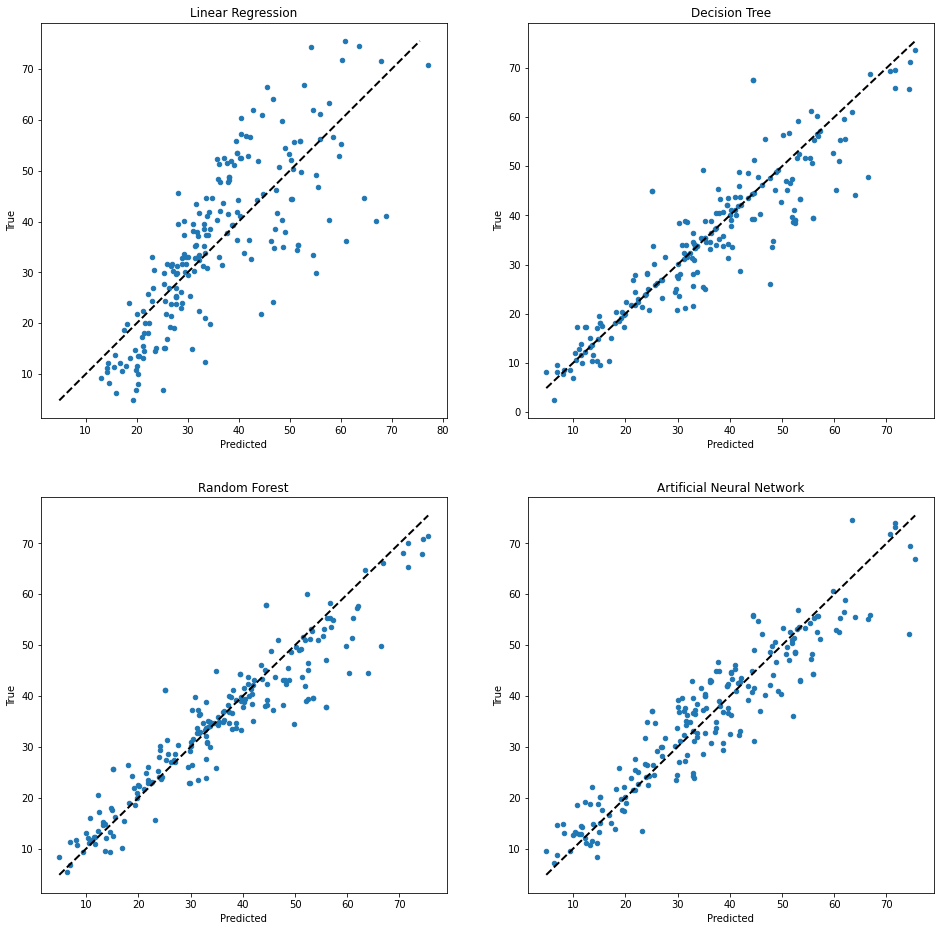

In [21]:
fig, ax = plt.subplots(2,2, figsize=(16,16))

ax[0][0].scatter(y_pred_lr, y_test, s=20)
ax[0][0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[0][0].set_ylabel("True")
ax[0][0].set_xlabel("Predicted")
ax[0][0].set_title("Linear Regression")

ax[0][1].scatter(y_test, y_pred_dtr, s=20)
ax[0][1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[0][1].set_ylabel("True")
ax[0][1].set_xlabel("Predicted")
ax[0][1].set_title("Decision Tree")

ax[1][0].scatter(y_test, y_pred_rfr, s=20)
ax[1][0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[1][0].set_ylabel("True")
ax[1][0].set_xlabel("Predicted")
ax[1][0].set_title("Random Forest")

ax[1][1].scatter(y_test, y_pred_ann, s=20)
ax[1][1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[1][1].set_ylabel("True")
ax[1][1].set_xlabel("Predicted")
ax[1][1].set_title("Artificial Neural Network")

plt.savefig("prediction_graph.png", bbox_inches = "tight")

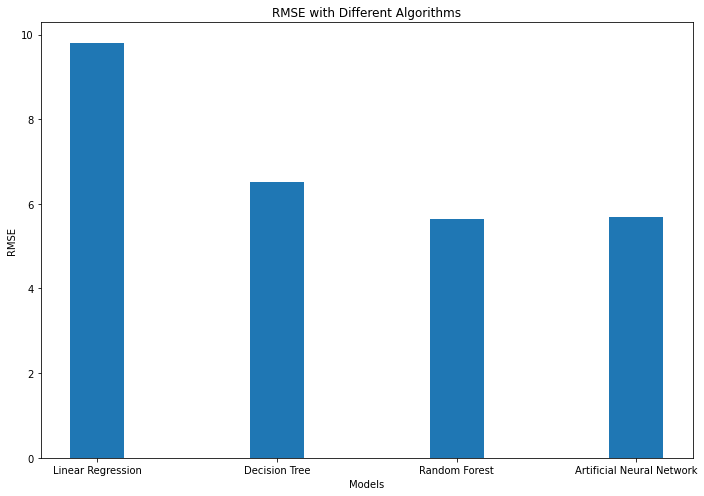

In [22]:
models = [lr, dtr, rfr, model]
names = ["Linear Regression", "Decision Tree", "Random Forest", "Artificial Neural Network"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=0)
fig.tight_layout()

plt.savefig("comparison.png", bbox_inches = "tight")
plt.show()